<a href="https://colab.research.google.com/github/diegalvez/Telecom-X/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **IMPORTAÇÃO DAS BIBLIOTECAS**

In [272]:
#Importando as bibliotecas necessarias para o projeto
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **EXTRAÇÃO DOS DADOS**

In [273]:
#Usando a variável 'url' para receber o link raw dos dados que estão no github
url = 'https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [274]:
#Usando a variável 'dados' para receber o resultado da leitura do arquivo raw presente na variável 'url'
dados = pd.read_json(url)

In [275]:
#Exibindo as 5 primeiras linhas do data frame gerado.
dados.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [276]:
#Metodo utilizado para transformar um dataframe aninhado em um data frame completo
dados_normalizados = pd.json_normalize(dados.to_dict(orient='records'))


In [277]:
#Exibindo as 5 primeiras linhas do data frame normalizado.
dados_normalizados.head()

,customerID,Churn,customer.gender,customer.SeniorCitizen,customer.Partner,customer.Dependents,customer.tenure,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.OnlineBackup,internet.DeviceProtection,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,account.Contract,account.PaperlessBilling,account.PaymentMethod,account.Charges.Monthly,account.Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


# **TRANSFORMAÇÃO DOS DADOS**

In [278]:
#verificando como estão descritos os nomes das colunas.
#há letras maiuculas e minusculas que podem confundir as manipulações.
#O separador dos titulos das colunas é o ponto (.)
dados_normalizados.columns

Index(['customerID', 'Churn', 'customer.gender', 'customer.SeniorCitizen',
       'customer.Partner', 'customer.Dependents', 'customer.tenure',
       'phone.PhoneService', 'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'account.Contract',
       'account.PaperlessBilling', 'account.PaymentMethod',
       'account.Charges.Monthly', 'account.Charges.Total'],
      dtype='object')

In [279]:
#método str.lower() transforma todas as letras em minusculas
#método str.replace('.' , '_') troca o ponto (.) pelo (_)
#A atribuição é feita pelo dados_normalizados.columns =
#Sem essa atribuição nada mudaria no dataframe
dados_normalizados.columns = dados_normalizados.columns.str.lower().str.replace('.', '_')

In [280]:
#Metodo para trocar os nomes das colunas para facilitar entendimento da tabela
novo_nome_coluna = {
    'customerid': 'cliente_id',
    'churn': 'evasao',
    'customer_gender': 'cliente_genero',
    'customer_seniorcitizen': 'cliente_mais_65',
    'customer_partner':'cliente_parceiro',
    'customer_dependents':'cliente_dependentes',
    'customer_tenure':'meses_contrato',
    'phone_phoneservice':'assinatura_servico_telefonico',
    'phone_multiplelines':'multiplas_linhas_telefonicas',
    'internet_internetservice':'servico_internet',
    'internet_onlinesecurity':'servico_seguranca_online',
    'internet_onlinebackup':'servico_beckup_online',
    'internet_deviceprotection':'protecao_dispositivo',
    'internet_techsupport':'suporte_tecnico_internet',
    'internet_streamingtv':'internet_tv_streaming',
    'internet_streamingmovies':'streaming_filmes',
    'account_contract':'tipo_contrato',
    'account_paperlessbilling':'fatura_online',
    'account_paymentmethod':'metodo_pagamento',
    'account_charges_monthly':'conta_mensal',
    'account_charges_total':'valor_total_contas'
}

dados_normalizados = dados_normalizados.rename(columns=novo_nome_coluna)

In [281]:
#Nessa primeira linha criei a nova coluna 'contas_diarias' e fiz a divisao da coluna 'total_servicos_mes' por 30 para descobrir os gastos diarios
dados_normalizados['contas_diarias']=dados_normalizados['conta_mensal']/30
#Aqui usei um metodo para ter apenas duas casas decimais após o ponto (.), mantendo o padrao do dataframe
dados_normalizados['contas_diarias'] = dados_normalizados['contas_diarias'].round(2)
dados_normalizados.head()

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,2.80


In [282]:
#Metodo para atualizar a coluna 'total_gastos_acumulado' que estava como (object) em dados tipo (float64)
#foi preciso tratar as inconsistencias contidas na coluna para conseguir fazer essa atualização.
dados_normalizados['valor_total_contas'] = dados_normalizados['valor_total_contas'].str.strip()
dados_normalizados['valor_total_contas'] = dados_normalizados['valor_total_contas'].replace(',','.', regex=False)
dados_normalizados['valor_total_contas'] = dados_normalizados['valor_total_contas'].replace('',np.nan)
dados_normalizados['valor_total_contas'] = dados_normalizados['valor_total_contas'].astype(float)

In [283]:
#Aqui estou inserindo 'nan' em todas as linhas que estao vazias '' do dataframe inteiro
dados_normalizados = dados_normalizados.replace('',np.nan)

In [284]:
#Aqui estou convertendo todas as colunas dentro do [] que possuem 'yes' e 'no' para 0 e 1 (binário)
colunas_convertidas = ['cliente_parceiro','cliente_dependentes','servico_internet','assinatura_servico_telefonico','fatura_online']
mapeamento = {'Yes': 1, 'No': 0}
dados_normalizados[colunas_convertidas] = dados_normalizados[colunas_convertidas].replace(mapeamento);

<ipython-input-284-3691973427>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados[colunas_convertidas] = dados_normalizados[colunas_convertidas].replace(mapeamento);


In [285]:
#Fiz a conversao separada da coluna "cliente_saiu" pois estava gerando erro de tipos diferentes no procedimento acima
mapeamento = {"Yes": 1, "No": 0}

dados_normalizados["evasao"] = dados_normalizados["evasao"].replace(mapeamento).astype(pd.Int64Dtype());

<ipython-input-285-2018957451>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados_normalizados["evasao"] = dados_normalizados["evasao"].replace(mapeamento).astype(pd.Int64Dtype());


In [286]:
#Exibe as 5 primeiras linhas do dataframe ja com os titulos das colunas alterados e a conversão das atrings yes e no para 1 e 0.
dados_normalizados.head()

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,No,DSL,...,No,Yes,Yes,No,One year,1,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,Yes,DSL,...,No,No,No,Yes,Month-to-month,0,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80


In [287]:
#Aqui foi criado um laço for para percorrer todas as colunas e imprimir na tela todos os valores unicos de cada coluna
for coluna in dados_normalizados.columns:
    print(f"Valores únicos em {coluna}:")
    print(dados_normalizados[coluna].unique())
    print("-" * 80)

Valores únicos em cliente_id:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores únicos em evasao:
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
--------------------------------------------------------------------------------
Valores únicos em cliente_genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores únicos em cliente_mais_65:
[0 1]
--------------------------------------------------------------------------------
Valores únicos em cliente_parceiro:
[1 0]
--------------------------------------------------------------------------------
Valores únicos em cliente_dependentes:
[1 0]
--------------------------------------------------------------------------------
Valores únicos em meses_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 

In [288]:
# Substituir 0 por 'Não' na coluna servico_internet
dados_normalizados["servico_internet"] = dados_normalizados["servico_internet"].replace(0, "No internet service")
dados_normalizados["servico_internet"] = dados_normalizados["servico_internet"].astype(str)

In [289]:
#Aqui foi criado um laço for para percorrer todas as colunas e imprimir na tela todos os valores unicos de cada coluna
for coluna in dados_normalizados.columns:
    print(f"Valores únicos em {coluna}:")
    print(dados_normalizados[coluna].unique())
    print("-" * 80)

Valores únicos em cliente_id:
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
--------------------------------------------------------------------------------
Valores únicos em evasao:
<IntegerArray>
[0, 1, <NA>]
Length: 3, dtype: Int64
--------------------------------------------------------------------------------
Valores únicos em cliente_genero:
['Female' 'Male']
--------------------------------------------------------------------------------
Valores únicos em cliente_mais_65:
[0 1]
--------------------------------------------------------------------------------
Valores únicos em cliente_parceiro:
[1 0]
--------------------------------------------------------------------------------
Valores únicos em cliente_dependentes:
[1 0]
--------------------------------------------------------------------------------
Valores únicos em meses_contrato:
[ 9  4 13  3 71 63  7 65 54 72  5 56 34  1 45 50 23 55 26 69 11 37 49 66
 67 20 43 59 12 27  2 25 29 14 35 

In [290]:
#exibindo a informação de todas as colunas.
#Aqui é possivel ver a quantidade de linhas desse dataframe e os tipo de dados de cada coluna.
dados_normalizados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_id                     7267 non-null   object 
 1   evasao                         7043 non-null   Int64  
 2   cliente_genero                 7267 non-null   object 
 3   cliente_mais_65                7267 non-null   int64  
 4   cliente_parceiro               7267 non-null   int64  
 5   cliente_dependentes            7267 non-null   int64  
 6   meses_contrato                 7267 non-null   int64  
 7   assinatura_servico_telefonico  7267 non-null   int64  
 8   multiplas_linhas_telefonicas   7267 non-null   object 
 9   servico_internet               7267 non-null   object 
 10  servico_seguranca_online       7267 non-null   object 
 11  servico_beckup_online          7267 non-null   object 
 12  protecao_dispositivo           7267 non-null   o

In [291]:
#Somando a quantidade de dados nulos que existem dentro de cada coluna.
dados_normalizados.isnull().sum()

,0
cliente_id,0
evasao,224
cliente_genero,0
cliente_mais_65,0
cliente_parceiro,0
cliente_dependentes,0
meses_contrato,0
assinatura_servico_telefonico,0
multiplas_linhas_telefonicas,0
servico_internet,0


In [292]:
#filtrei o data frame pra poder observar as linhas onde a coluna 'total_gastos' é NaN
dados_normalizados[dados_normalizados['valor_total_contas'].isnull()]

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
975,1371-DWPAZ,0,Female,0,1,1,0,0,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,0,Credit card (automatic),56.05,NaN,1.87
1775,2520-SGTTA,0,Female,0,1,1,0,1,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.00,NaN,0.67
1955,2775-SEFEE,0,Male,0,0,1,0,1,Yes,DSL,...,No,Yes,No,No,Two year,1,Bank transfer (automatic),61.90,NaN,2.06
2075,2923-ARZLG,0,Male,0,1,1,0,1,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,1,Mailed check,19.70,NaN,0.66
2232,3115-CZMZD,0,Male,0,0,1,0,1,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,20.25,NaN,0.68
2308,3213-VVOLG,0,Male,0,1,1,0,1,Yes,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.35,NaN,0.85
2930,4075-WKNIU,0,Female,0,1,1,0,1,Yes,DSL,...,Yes,Yes,Yes,No,Two year,0,Mailed check,73.35,NaN,2.44
3134,4367-NUYAO,0,Male,0,1,1,0,1,Yes,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Mailed check,25.75,NaN,0.86
3203,4472-LVYGI,0,Female,0,1,1,0,0,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,1,Bank transfer (automatic),52.55,NaN,1.75
4169,5709-LVOEQ,0,Female,0,1,1,0,1,No,DSL,...,Yes,No,Yes,Yes,Two year,0,Mailed check,80.85,NaN,2.70


In [293]:
# Filtragem usando a negação (~) do método .isin().
#O metodo .isin([1 , 0]) puxaria todas as linhas do data frame que tivessem 1 ou 0 na coluna 'cliente_saiu'. Como esse método foi negado, a função puxou as linhas da coluna 'evasao' que não continham 1 ou 0.
#Onde foi possivel analisar que existem linhas <NA> na coluna 'cliente_saiu'
#Decidi deixar assim e não converter para NaN, pois o pandas reconhece automaticamente que NaN é do tipo float, o que faria a saida 0 e 1 alterar para 0.0 e 1.0
dados_normalizados[~dados_normalizados['evasao'].isin([0,1])]

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
30,0047-ZHDTW,<NA>,Female,0,0,0,11,1,Yes,Fiber optic,...,No,No,No,No,Month-to-month,1,Bank transfer (automatic),79.00,929.30,2.63
75,0120-YZLQA,<NA>,Male,0,0,0,71,1,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Credit card (automatic),19.90,1355.10,0.66
96,0154-QYHJU,<NA>,Male,0,0,0,29,1,No,DSL,...,No,Yes,No,No,One year,1,Electronic check,58.75,1696.20,1.96
98,0162-RZGMZ,<NA>,Female,1,0,0,5,1,No,DSL,...,No,Yes,No,No,Month-to-month,0,Credit card (automatic),59.90,287.85,2.00
175,0274-VVQOQ,<NA>,Male,1,1,0,65,1,Yes,Fiber optic,...,Yes,No,Yes,Yes,One year,1,Bank transfer (automatic),103.15,6792.45,3.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,<NA>,Female,0,0,0,14,1,Yes,DSL,...,No,No,No,No,One year,1,Mailed check,54.25,773.20,1.81
7180,9872-RZQQB,<NA>,Female,0,1,0,49,0,No phone service,DSL,...,No,No,Yes,No,Month-to-month,0,Bank transfer (automatic),40.65,2070.75,1.36
7211,9920-GNDMB,<NA>,Male,0,0,0,9,1,Yes,Fiber optic,...,No,No,No,No,Month-to-month,1,Electronic check,76.25,684.85,2.54
7239,9955-RVWSC,<NA>,Female,0,1,1,67,1,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,1,Bank transfer (automatic),19.25,1372.90,0.64


In [294]:
#Esse método faz a soma das linhas de cada coluna cujo valor está em branco.
dados_normalizados.eq("").sum()


,0
cliente_id,0
evasao,0
cliente_genero,0
cliente_mais_65,0
cliente_parceiro,0
cliente_dependentes,0
meses_contrato,0
assinatura_servico_telefonico,0
multiplas_linhas_telefonicas,0
servico_internet,0


In [295]:
#Aqui estou criando uma nova variavel para receber os dados do data frame cujo a coluna 'cliente_saiu' possui o valor 1.
#Ou seja, aqui estou criando uma variavel para caso eu precise trabalhar com os dados dos clientes que ja sairam da empresa.
dados_clientes_sairam = dados_normalizados[dados_normalizados['evasao'] == 1]
dados_clientes_sairam.head()

,cliente_id,evasao,cliente_genero,cliente_mais_65,cliente_parceiro,cliente_dependentes,meses_contrato,assinatura_servico_telefonico,multiplas_linhas_telefonicas,servico_internet,...,protecao_dispositivo,suporte_tecnico_internet,internet_tv_streaming,streaming_filmes,tipo_contrato,fatura_online,metodo_pagamento,conta_mensal,valor_total_contas,contas_diarias
2,0004-TLHLJ,1,Male,0,0,0,4,1,No,Fiber optic,...,Yes,No,No,No,Month-to-month,1,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,1,Male,1,1,0,13,1,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,1,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,1,Female,1,1,0,3,1,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,1,Mailed check,83.9,267.40,2.80
18,0022-TCJCI,1,Male,1,0,0,45,1,No,DSL,...,Yes,No,No,Yes,One year,0,Credit card (automatic),62.7,2791.50,2.09
19,0023-HGHWL,1,Male,1,0,0,1,0,No phone service,DSL,...,No,No,No,No,Month-to-month,1,Electronic check,25.1,25.10,0.84


In [296]:
#Aqui pedi para exibir a informação do data frame dos clientes que ja sairam da empresa.
#É possível observar que dos 7267 cliente, 1869 sairam da empresa.
dados_clientes_sairam.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1869 entries, 2 to 7263
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   cliente_id                     1869 non-null   object 
 1   evasao                         1869 non-null   Int64  
 2   cliente_genero                 1869 non-null   object 
 3   cliente_mais_65                1869 non-null   int64  
 4   cliente_parceiro               1869 non-null   int64  
 5   cliente_dependentes            1869 non-null   int64  
 6   meses_contrato                 1869 non-null   int64  
 7   assinatura_servico_telefonico  1869 non-null   int64  
 8   multiplas_linhas_telefonicas   1869 non-null   object 
 9   servico_internet               1869 non-null   object 
 10  servico_seguranca_online       1869 non-null   object 
 11  servico_beckup_online          1869 non-null   object 
 12  protecao_dispositivo           1869 non-null   object

In [297]:
print(dados_normalizados["servico_internet"].dtype)

object


# **VISUALIZAÇÃO DOS DADOS**

### 1.   STATUS GERAL DOS CLIENTES



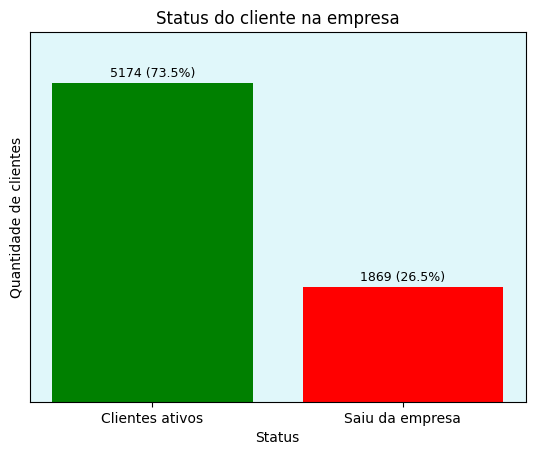

In [298]:
# Extrai os valores
contagem = dados_normalizados["evasao"].value_counts()

# Criando a figura e o eixo principal para evitar erros
fig, ax = plt.subplots()

# Criando um degradê de fundo
#gradient = np.linspace(0, 1, 256).reshape(1, -1)  # Matriz para criar o efeito
#ax.imshow(gradient, aspect="auto", cmap="coolwarm", extent=[-0.5, 1.5, 0, max(contagem.values)*1.1], zorder=0)
ax.set_facecolor("#E0F7FA") #Azul claro

# Criando o gráfico de barras
ax.bar(contagem.index, contagem.values, color=["Green", "red"], zorder=2)

# Adicionando rótulos e título
ax.set_xlabel("Status")
ax.set_ylabel("Quantidade de clientes")
ax.set_title("Status do cliente na empresa")

# Ajustando os rótulos do eixo X
ax.set_xticks([0, 1])
ax.set_xticklabels(["Clientes ativos", "Saiu da empresa"])

#Alterações adicionadas no eixo Y
ax.set_ylim(0, 6000)

#Inserindo os valores absolutos + o percentual em cima das barras
total = contagem.sum()  # Soma total de clientes

for i, valor in enumerate(contagem.values):
    porcentagem = (valor / total) * 100
    ax.text(i, valor + 100, f"{valor} ({porcentagem:.1f}%)", ha="center", fontsize=9)

#Limpa os valores numericos que apareceriam no eixo y
ax.set_yticks([])

plt.show()

### 2. PERFIL DO CLIENTE

**Gênero**

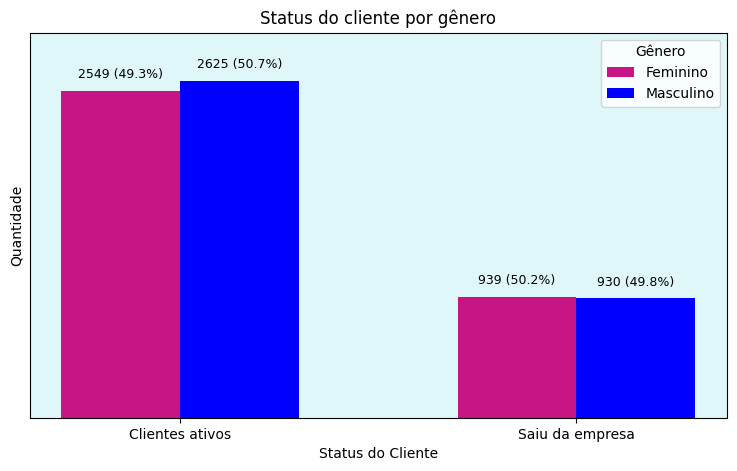

In [299]:
# Agrupar os dados por cliente_saiu e cliente_genero
contagem = dados_normalizados.groupby(["evasao", "cliente_genero"]).size().unstack()

# Criando a figura e o eixo principal para evitar erros
fig, ax = plt.subplots(figsize = (9,5))

# Definir posições das barras
posicoes = [0, 1]  # Cliente ativo e saiu da empresa
width = 0.3  # Largura das barras

# Criando o gráfico de barras agrupadas
plt.bar(posicoes, contagem.loc[:, "Female"], width=width, label="Feminino", color="#C71585")
plt.bar([p + width for p in posicoes], contagem.loc[:, "Male"], width=width, label="Masculino", color="blue")


ax.set_facecolor("#E0F7FA") #Azul claro

# Ajustando rótulos
plt.xticks([p + width / 2 for p in posicoes], ["Clientes ativos", "Saiu da empresa"])
plt.xlabel("Status do Cliente")
plt.ylabel("Quantidade")
plt.title("Status do cliente por gênero")

#Alterações adicionadas no eixo Y
ax.set_ylim(0, 3000)
#Limpa os valores numericos que apareceriam no eixo y
ax.set_yticks([])

total_por_status = contagem.sum(axis=1)  # Soma total de clientes por status (ativo/saiu)

for i, status in enumerate(contagem.index):  # Itera sobre "Cliente ativo" e "Saiu"
    for j, genero in enumerate(contagem.columns):  # Itera sobre "Feminino" e "Masculino"
        valor = contagem.loc[status, genero]
        porcentagem = (valor / total_por_status[status]) * 100
        ax.text(i + (j * width), valor + 100, f"{valor} ({porcentagem:.1f}%)", ha="center", fontsize=9,)


# Adicionando legenda
plt.legend(title="Gênero")

plt.show()

### 3. TEMPO DE CONTRATO POR EVASÃO



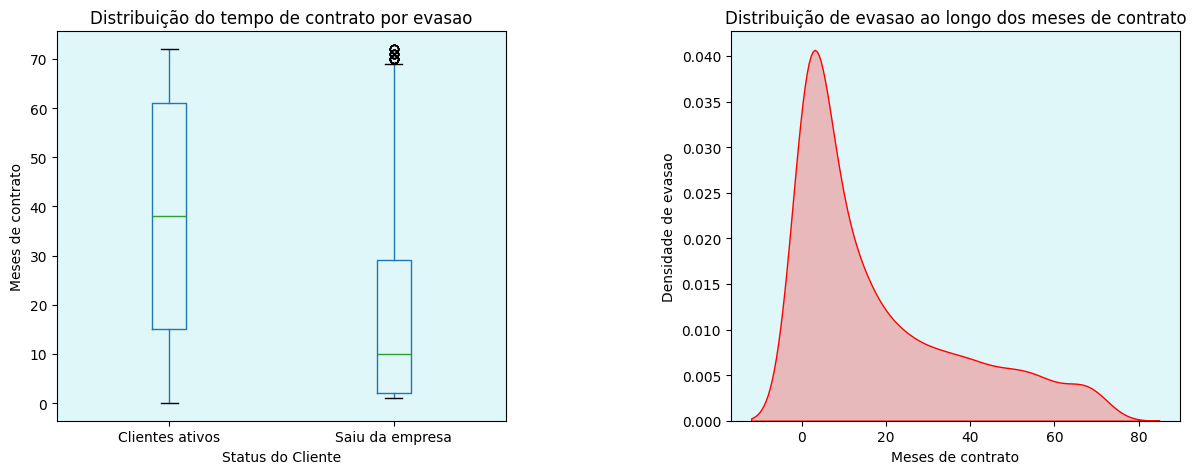

In [300]:
# Criando figura com dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Boxplot
dados_normalizados.boxplot(column="meses_contrato", by="evasao", grid=False, ax=ax1)
ax1.set_facecolor("#E0F7FA")  # Azul claro
ax1.set_xticks([1, 2])
ax1.set_xticklabels(["Clientes ativos", "Saiu da empresa"])
ax1.set_xlabel("Status do Cliente")
ax1.set_ylabel("Meses de contrato")
ax1.set_title("Distribuição do tempo de contrato por evasao")
#ax1.suptitle("")  # Remove o título automático do boxplot

# Densidade
dados_evasao = dados_normalizados[dados_normalizados["evasao"] == 1]
sns.kdeplot(dados_evasao["meses_contrato"], fill=True, color="red", ax=ax2)
ax2.set_xlabel("Meses de contrato")
ax2.set_ylabel("Densidade de evasao")
ax2.set_title("Distribuição de evasao ao longo dos meses de contrato")
ax2.set_facecolor("#E0F7FA")  # Azul claro

fig.suptitle('')

# Ajustando espaçamento para melhor visualização
plt.tight_layout()
plt.subplots_adjust(wspace=0.5)  # Aumenta espaço horizontal entre os gráficos
plt.show()


###4. SERVIÇOS DE TELEFONIA

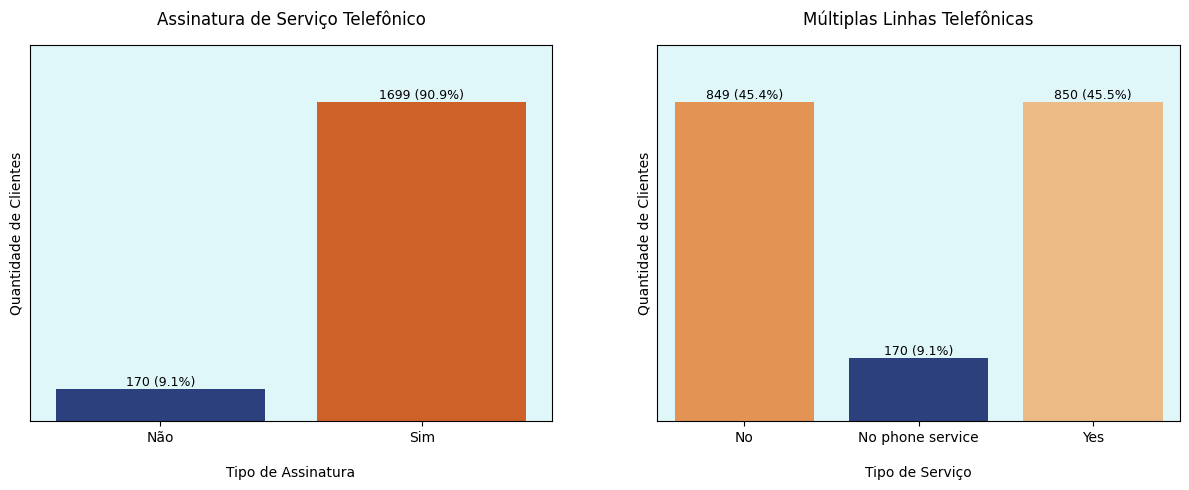

In [301]:
# Filtrar clientes que saíram da empresa
dados_evasao = dados_normalizados[dados_normalizados["evasao"] == 1]

custom_palette_ax1 = ["#1E3A8A", "#EA580C"]
custom_palette_ax2 = ["#FB923C","#1E3A8A", "#FDBA74"]

# Criar figura com dois gráficos lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de barras - Assinatura de serviço telefônico
sns.countplot(x="assinatura_servico_telefonico", hue="assinatura_servico_telefonico",
  data=dados_evasao, ax=ax1, palette=custom_palette_ax1, legend=False)

ax1.set_facecolor("#E0F7FA")  # Azul claro
ax1.set_title("Assinatura de Serviço Telefônico", pad=15)
ax1.set_xlabel("Tipo de Assinatura")
ax1.set_ylabel("Quantidade de Clientes")
# Ajustando os rótulos do eixo X
ax1.set_xticks([0, 1])
ax1.set_xticklabels(["Não", "Sim"])

# Gráfico de barras - Múltiplas linhas telefônicas
sns.countplot(x="multiplas_linhas_telefonicas", hue="multiplas_linhas_telefonicas",
  data=dados_evasao, ax=ax2, palette=custom_palette_ax2, legend=False)

ax2.set_facecolor("#E0F7FA")  # Azul claro
ax2.set_title("Múltiplas Linhas Telefônicas", pad=15)
ax2.set_xlabel("Tipo de Serviço")
ax2.set_ylabel("Quantidade de Clientes")

ax1.set_ylim(0, 2000)
ax2.set_ylim(0, 1000)

ax1.set_yticks([])
ax2.set_yticks([])

# Adicionando valores nas barras (contagem e porcentagem)
for ax in [ax1, ax2]:
    for p in ax.patches:  # Percorre cada barra
        altura = p.get_height()
        total = len(dados_evasao)  # Total de clientes que saíram
        porcentagem = 100 * altura / total  # Calcula porcentagem
        ax.annotate(f'{int(altura)} ({porcentagem:.1f}%)',  # Formato: "contagem (porcentagem)"
                    (p.get_x() + p.get_width() / 2, altura),  # Posição no topo da barra
                    ha='center', va='bottom', fontsize=9, color='black', fontweight=False)#tirei o bold e coloquei False

# Ajustando espaçamento entre os gráficos
ax1.set_xlabel("Tipo de Assinatura", labelpad=15)  # Ajusta espaçamento no ax1
ax2.set_xlabel("Tipo de Serviço", labelpad=15)  # Ajusta espaçamento no ax2

plt.tight_layout()
plt.subplots_adjust(wspace=0.2)  # Aumenta espaço horizontal entre os gráficos

plt.show()


### 5. SERVIÇOS DE INTERNET

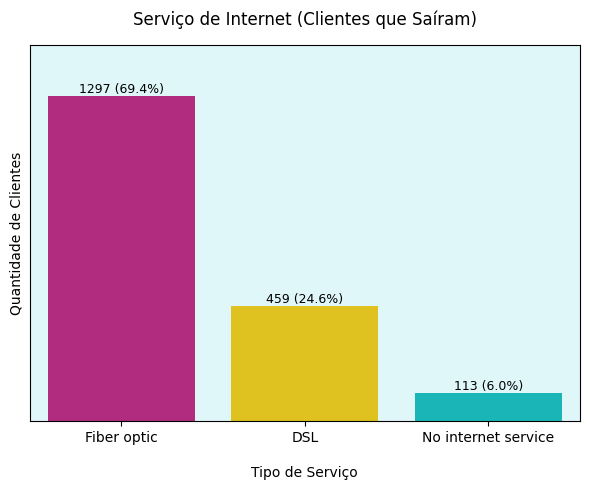

In [302]:
# Criar figura com um gráfico de barras
fig, ax = plt.subplots(figsize=(6, 5))

# Definir paleta com rosa escuro e outras cores
custom_palette = ["#C71585", "#FFD700", "#00CED1"]  # Rosa escuro, dourado, ciano

# Gráfico de barras - Serviço de Internet
sns.countplot(x="servico_internet", hue="servico_internet", data=dados_normalizados[dados_normalizados["evasao"] == 1],
              ax=ax, palette=custom_palette, legend=False)

ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_title("Serviço de Internet (Clientes que Saíram)", pad=15)
ax.set_xlabel("Tipo de Serviço", labelpad=15)
ax.set_ylabel("Quantidade de Clientes")

# Adicionar valores nas barras (contagem e porcentagem)
for p in ax.patches:
    altura = p.get_height()
    total = len(dados_normalizados[dados_normalizados["evasao"] == 1])
    porcentagem = 100 * altura / total
    ax.annotate(f'{int(altura)} ({porcentagem:.1f}%)',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom', fontsize=9, color='black')

plt.ylim(0, 1500)
plt.yticks([])
plt.tight_layout()
plt.show()

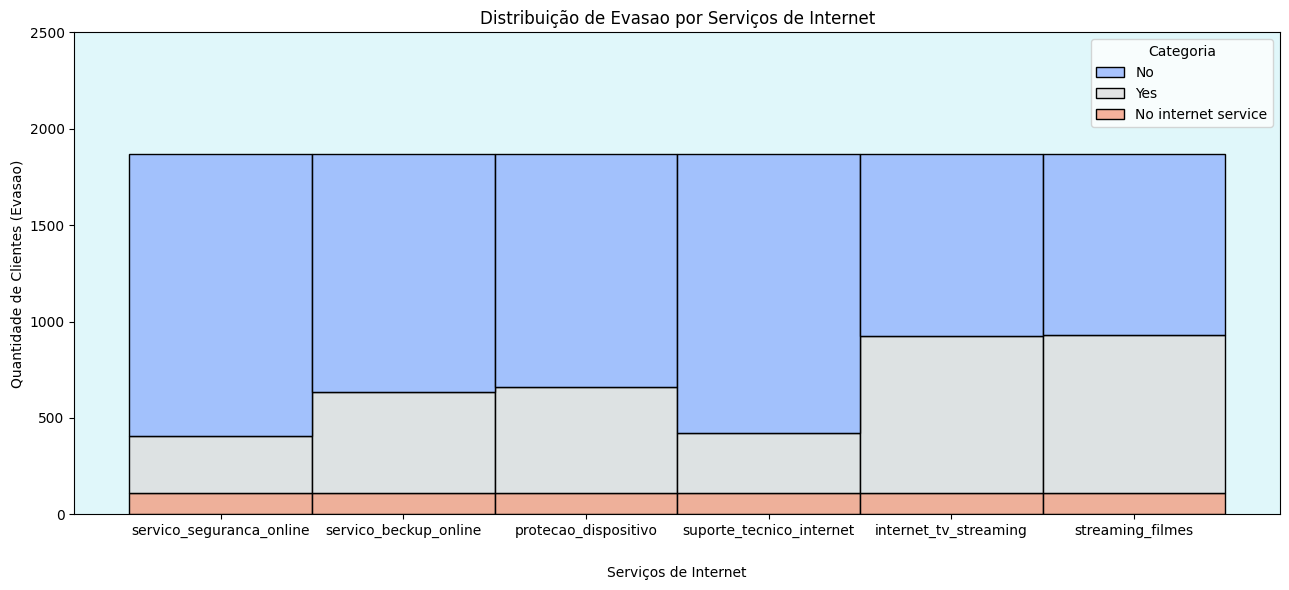

In [303]:
# Filtrando clientes que saíram da empresa (evasao = 1)
dados_evasao = dados_normalizados[dados_normalizados["evasao"] == 1]

# Selecionando as colunas dos serviços de internet
servicos_internet = [
    "servico_seguranca_online",
    "servico_beckup_online",
    "protecao_dispositivo",
    "suporte_tecnico_internet",
    "internet_tv_streaming",
    "streaming_filmes"
]

# Transformando os dados para formato adequado (melt)
dados_melted = dados_evasao.melt(value_vars=servicos_internet, var_name="Servico", value_name="Categoria")

# Criando o gráfico de barras empilhado
plt.figure(figsize=(13, 6))
sns.histplot(data=dados_melted, x="Servico", hue="Categoria", multiple="stack", palette="coolwarm")

# Ajustando título e rótulos
plt.xlabel("Serviços de Internet", labelpad=20)
plt.ylabel("Quantidade de Clientes (Evasao)")
plt.title("Distribuição de Evasao por Serviços de Internet")
#plt.xticks(rotation=30)  # Rotaciona os rótulos para facilitar leitura
plt.ylim(0, 2500)  # Define os limites do eixo Y
plt.tight_layout()
plt.gca().set_facecolor("#E0F7FA")  # Azul claro


plt.show()


### 6. CONTRATOS

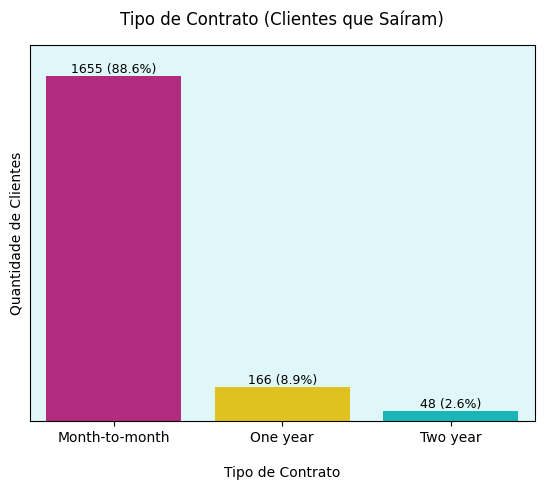

In [304]:
# Criar figura com um gráfico de barras
fig, ax = plt.subplots(figsize=(6, 5))

# Definir paleta com rosa escuro e cores complementares
custom_palette = ["#C71585", "#FFD700", "#00CED1"]  # Rosa escuro, dourado, ciano

# Gráfico de barras - Tipo de Contrato para clientes que saíram
sns.countplot(x="tipo_contrato", hue="tipo_contrato",
              data=dados_normalizados[dados_normalizados["evasao"] == 1],
              ax=ax, palette=custom_palette, legend=False)

# Configurações do gráfico
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_title("Tipo de Contrato (Clientes que Saíram)", pad=15)
ax.set_xlabel("Tipo de Contrato", labelpad=15)
ax.set_ylabel("Quantidade de Clientes")

# Adicionar valores nas barras (contagem e porcentagem)
for p in ax.patches:
    altura = p.get_height()
    total = len(dados_normalizados[dados_normalizados["evasao"] == 1])
    porcentagem = 100 * altura / total
    ax.annotate(f'{int(altura)} ({porcentagem:.1f}%)',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom', fontsize=9, color='black')

plt.ylim(0, 1800)  # Define os limites do eixo Y
plt.tight_layout()
plt.yticks([])
plt.show()

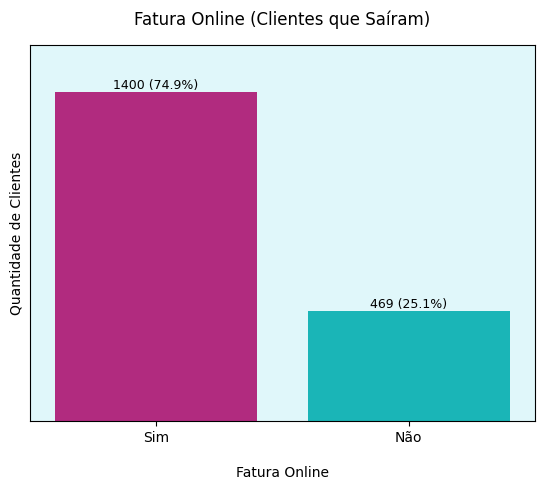

In [305]:
# Substituir 0 por 'Não' e 1 por 'Sim' na coluna fatura_online
dados_normalizados["fatura_online"] = dados_normalizados["fatura_online"].replace({0: "Não", 1: "Sim"})
# Criar figura com um gráfico de barras
fig, ax = plt.subplots(figsize=(6, 5))

# Definir paleta com rosa escuro e ciano
custom_palette = ["#C71585", "#00CED1"]  # Rosa escuro para 'Não', ciano para 'Sim'

# Gráfico de barras - Fatura Online para clientes que saíram
sns.countplot(x="fatura_online", hue="fatura_online",
              data=dados_normalizados[dados_normalizados["evasao"] == 1],
              ax=ax, palette=custom_palette, legend=False)

# Configurações do gráfico
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_title("Fatura Online (Clientes que Saíram)", pad=15)
ax.set_xlabel("Fatura Online", labelpad=15)
ax.set_ylabel("Quantidade de Clientes")

# Adicionar valores nas barras (contagem e porcentagem)
for p in ax.patches:
    altura = p.get_height()
    total = len(dados_normalizados[dados_normalizados["evasao"] == 1])
    porcentagem = 100 * altura / total
    ax.annotate(f'{int(altura)} ({porcentagem:.1f}%)',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom', fontsize=9, color='black')

plt.ylim(0, 1600)  # Define os limites do eixo Y
plt.tight_layout()
plt.yticks([])
plt.show()

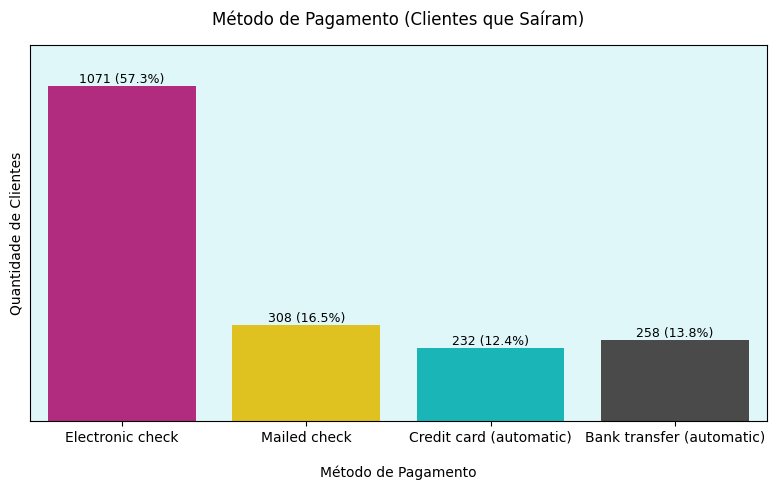

In [306]:
# Criar figura com um gráfico de barras
fig, ax = plt.subplots(figsize=(8, 5))

# Definir paleta com rosa escuro e cores complementares
custom_palette = ["#C71585", "#FFD700", "#00CED1", "#4A4A4A"]  # Rosa escuro, dourado, ciano, cinza

# Gráfico de barras - Método de Pagamento para clientes que saíram
sns.countplot(x="metodo_pagamento", hue="metodo_pagamento",
              data=dados_normalizados[dados_normalizados["evasao"] == 1],
              ax=ax, palette=custom_palette, legend=False)

# Configurações do gráfico
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_title("Método de Pagamento (Clientes que Saíram)", pad=15)
ax.set_xlabel("Método de Pagamento", labelpad=15)
ax.set_ylabel("Quantidade de Clientes")

# Adicionar valores nas barras (contagem e porcentagem)
for p in ax.patches:
    altura = p.get_height()
    total = len(dados_normalizados[dados_normalizados["evasao"] == 1])
    porcentagem = 100 * altura / total
    ax.annotate(f'{int(altura)} ({porcentagem:.1f}%)',
                (p.get_x() + p.get_width() / 2, altura),
                ha='center', va='bottom', fontsize=9, color='black')

plt.ylim(0, 1200)  # Define os limites do eixo Y
plt.yticks([])
plt.tight_layout()
plt.show()

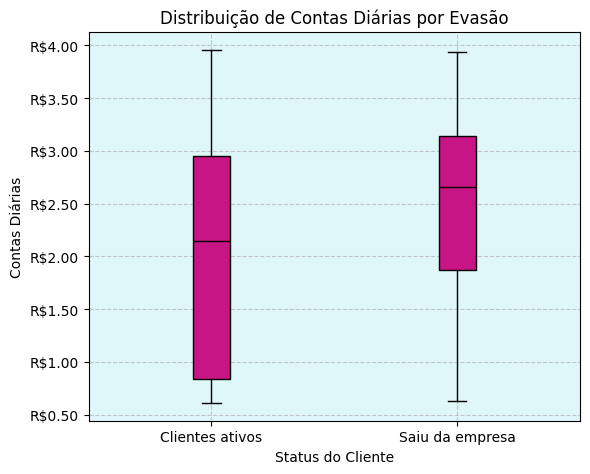

In [307]:
# Criar figura com um gráfico boxplot
fig, ax = plt.subplots(figsize=(6, 5))

# Boxplot - Contas Diárias por Evasão
dados_normalizados.boxplot(column="contas_diarias", by="evasao", grid=False, ax=ax, patch_artist=True,
                          boxprops=dict(facecolor="#C71585", color="black"),
                          medianprops=dict(color="black"),
                          whiskerprops=dict(color="black"),
                          capprops=dict(color="black"))

# Configurações do gráfico
ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Grid pontilhado atrás
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_xticks([1, 2])
ax.set_xticklabels(["Clientes ativos", "Saiu da empresa"])
ax.set_xlabel("Status do Cliente")
ax.set_ylabel("Contas Diárias")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:.2f}'))  # Formatar eixo Y como R$
ax.set_title("Distribuição de Contas Diárias por Evasão")
fig.suptitle("")  # Remove o título automático do boxplot

plt.tight_layout()
plt.show()

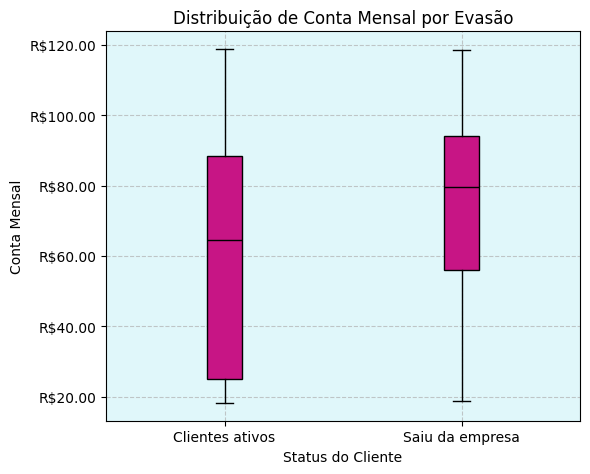

In [308]:
# Criar figura com um gráfico boxplot
fig, ax = plt.subplots(figsize=(6, 5))

# Boxplot - Conta Mensal por Evasão
dados_normalizados.boxplot(column="conta_mensal", by="evasao", grid=False, ax=ax, patch_artist=True,
                          boxprops=dict(facecolor="#C71585", color="black", zorder=3),
                          medianprops=dict(color="black", zorder=3),
                          whiskerprops=dict(color="black", zorder=3),
                          capprops=dict(color="black", zorder=3))

# Configurações do gráfico
ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Grid pontilhado atrás
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_xticks([1, 2])
ax.set_xticklabels(["Clientes ativos", "Saiu da empresa"])
ax.set_xlabel("Status do Cliente")
ax.set_ylabel("Conta Mensal")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:.2f}'))  # Formatar eixo Y como R$
ax.set_title("Distribuição de Conta Mensal por Evasão")
fig.suptitle("")  # Remove o título automático do boxplot

plt.tight_layout()
plt.show()

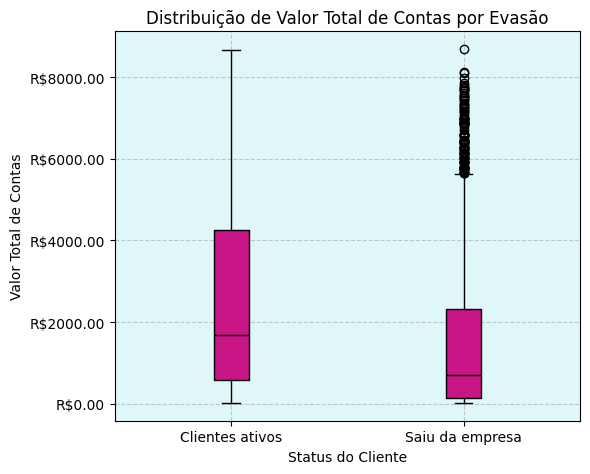

In [309]:
# Criar figura com um gráfico boxplot
fig, ax = plt.subplots(figsize=(6, 5))

# Boxplot - Valor Total de Contas por Evasão
dados_normalizados.boxplot(column="valor_total_contas", by="evasao", grid=False, ax=ax, patch_artist=True,
                          boxprops=dict(facecolor="#C71585", color="black", zorder=3),
                          medianprops=dict(color="black", zorder=3),
                          whiskerprops=dict(color="black", zorder=3),
                          capprops=dict(color="black", zorder=3))

# Configurações do gráfico
ax.grid(True, linestyle='--', alpha=0.7, zorder=0)  # Grid pontilhado atrás
ax.set_facecolor("#E0F7FA")  # Azul claro
ax.set_xticks([1, 2])
ax.set_xticklabels(["Clientes ativos", "Saiu da empresa"])
ax.set_xlabel("Status do Cliente")
ax.set_ylabel("Valor Total de Contas")
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'R${x:.2f}'))  # Formatar eixo Y como R$
ax.set_title("Distribuição de Valor Total de Contas por Evasão")
fig.suptitle("")  # Remove o título automático do boxplot

plt.tight_layout()
plt.show()

In [319]:
# Estilo dos gráficos
sns.set(style='whitegrid')
custom_palette = 'BuGn'  # tons de azul-verde

# Exibir gráficos com tamanho padrão
#plt.rcParams['figure.figsize'] = (8, 4)


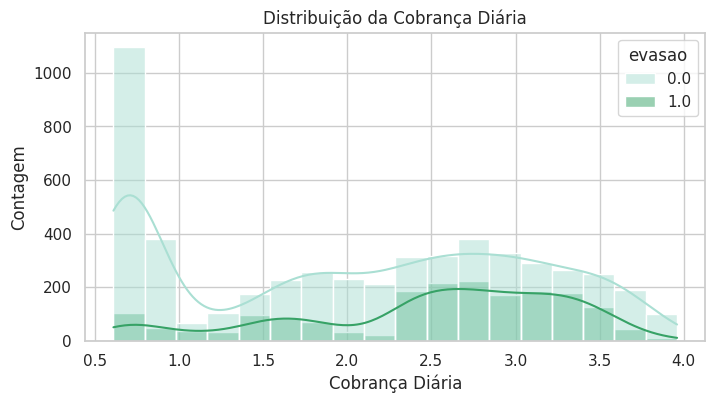

In [320]:
sns.histplot(data=dados_normalizados, x='contas_diarias', hue='evasao', kde=True, palette=custom_palette)
plt.title('Distribuição da Cobrança Diária')
plt.xlabel('Cobrança Diária')
plt.ylabel('Contagem')
plt.show()